## Using different models on Processed data.

In [12]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('df_with_sentimentscore_and_merged.csv')
df.shape

(150346, 20)

In [10]:
df['business_id'].nunique()

150346

In [11]:
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,stars_x,sentiment_score,useful,funny,cool
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,4.857143,0.656614,9,3,1
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,0.618500,19,6,6
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,0.794850,21,20,12
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,0.695723,131,47,95
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,0.888331,2,0,0


In [ ]:
# df['score'] = df['stars'] + df['sentiment_score']*2
# y = df['score']



In [32]:
New_df = df[['stars', 'sentiment_score', 'score']]

In [64]:
for col in New_df.columns:
    range_col = New_df[col].max() - New_df[col].min()
    print(f"Range of {col}: {range_col}")

Range of stars: 4.0
Range of sentiment_score: 1.90848
Range of score: 7.81696


In [67]:
print(New_df['score'].min())
print(New_df['score'].max())

-0.8278000000000001
6.98916


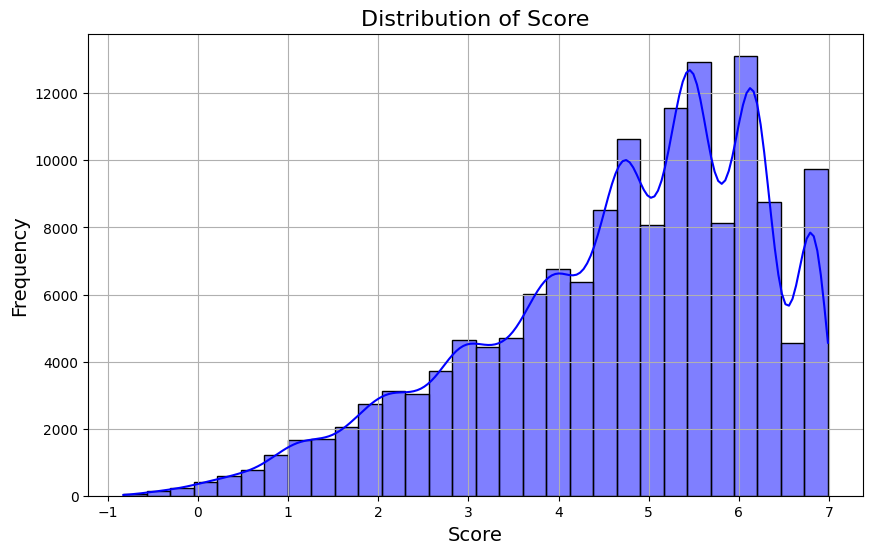

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the score variable
plt.figure(figsize=(10, 6))
sns.histplot(New_df['score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Score', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [35]:
New_df.corr()
New_df.isnull().sum()

stars              0
sentiment_score    0
score              0
dtype: int64

In [36]:
features = ['stars', 'sentiment_score']
X = New_df[features]
y = New_df['score']

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

Model Performance Metrics:
Root Mean Squared Error (RMSE): 0.2128
Mean Absolute Error (MAE): 0.1715
R² Score: 0.9817


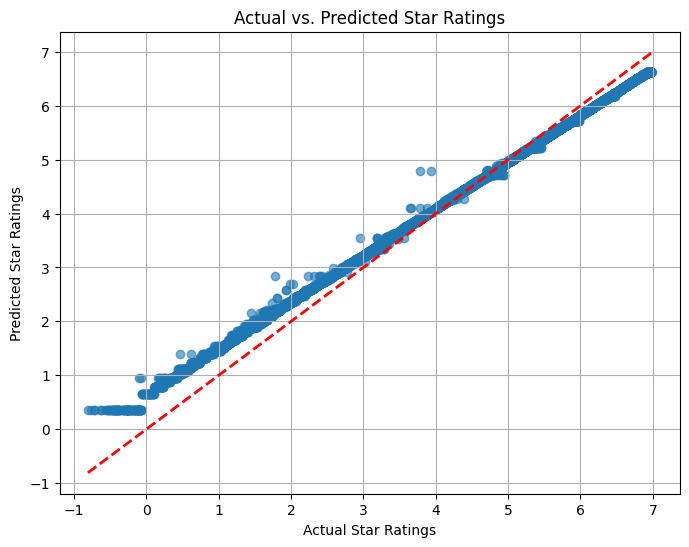

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=6, learning_rate=0.01)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print("Model Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Star Ratings")
plt.xlabel("Actual Star Ratings")
plt.ylabel("Predicted Star Ratings")
plt.grid(True)
plt.show()



 

In [57]:
from sklearn.ensemble import RandomForestRegressor

Random Forest Performance Metrics:
Root Mean Squared Error (RMSE): 0.0043
Mean Absolute Error (MAE): 0.0008
R² Score: 1.0000


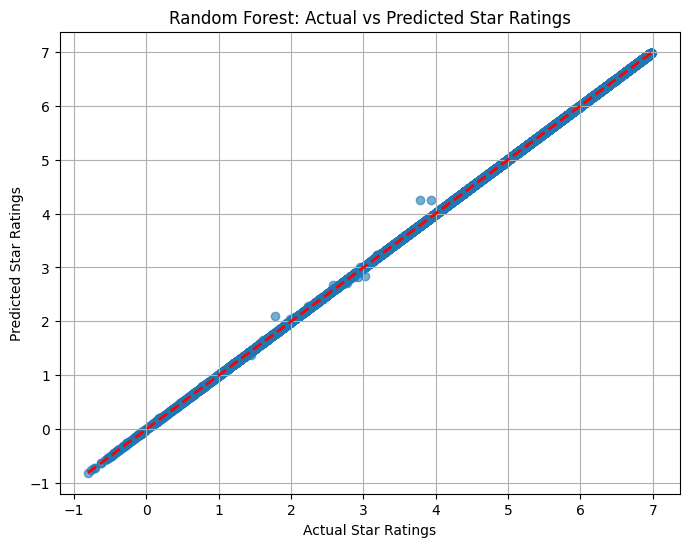

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Random Forest: Actual vs Predicted Star Ratings")
plt.xlabel("Actual Star Ratings")
plt.ylabel("Predicted Star Ratings")
plt.grid(True)
plt.show()

Support Vector Regressor Performance Metrics:
Root Mean Squared Error (RMSE): 0.1243
Mean Absolute Error (MAE): 0.1054
R² Score: 0.9937


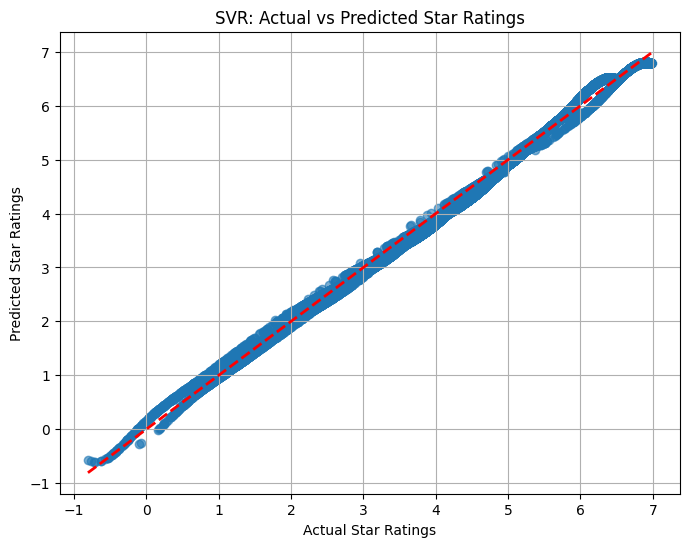

In [59]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svr = svr.predict(X_test_scaled)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("SVR: Actual vs Predicted Star Ratings")
plt.xlabel("Actual Star Ratings")
plt.ylabel("Predicted Star Ratings")
plt.grid(True)
plt.show()


In [72]:
print("Performance Metrics:")
print(f"Root Mean Squared Error (RMSE):\nSVR {rmse_svr:.4f}, \nXGB{rmse_xgb:.4f}, \nRF{rmse_rf:.4f} ")
print(f"Mean Absolute Error (MAE):\nSVR {mae_svr:.4f}, \nXGB{mae_xgb:.4f}, \nRF{mae_rf:.4f}")
print(f"R² Score:\nSVR {r2_svr:.4f}, \nXGB{r2_xgb:.4f}, \nRF{r2_rf:.4f}")

Performance Metrics:
Root Mean Squared Error (RMSE):
SVR 0.1243, 
XGB0.2128, 
RF0.0043 
Mean Absolute Error (MAE):
SVR 0.1054, 
XGB0.1715, 
RF0.0008
R² Score:
SVR 0.9937, 
XGB0.9817, 
RF1.0000


In [55]:
print(rmse_xgb)

NameError: name 'rmse_xgb' is not defined

In [73]:

with open('model_weighted3_attr.pkl', 'wb') as file:

    pickle.dump(rf, file) 

In [46]:
X_train.shape

(120276, 2)